In [3]:
import numpy as np

In [4]:
def isprime(x):
    if x == 0:
        return 0
    if x == 1 or x == 2:
        return 1
    for i in range(2, x):
        if x % i == 0:
            return 0 
        else:
            return 1
X = [i for i in range(8)]
y = [isprime(i) for i in X]

def map_last_digit(data):
    X_train = []
    for number in data:
        number = ord(str(number))
        binary_representation = bin(number)[5:]
        list_of_integers = [int(digit) for digit in binary_representation]
        X_train.append(list_of_integers)
    return np.array(X_train)

X_train = map_last_digit(X)
y_train = np.array(y)

In [5]:
print(X_train)
print(y_train)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0 1 1 1 0 1 0 1]


In [6]:
class NeuralNetwork:
    def __init__(self, layer_1: int, layer_2: int, output_size: int):
        self.weights_1 = np.random.uniform(low=-0.5, high=0.5, size=(layer_1, layer_1))
        self.weights_2 = np.random.uniform(low=-0.5, high=0.5, size=(layer_2, output_size))
        self.biases_1 = np.zeros((1, layer_2))
        self.biases_2 = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def train(self, X, y, learning_rate, epochs, verbose:bool=False):
        SSR = []
        MAE = []
        for epoch in range(epochs):
            total_error = 0
            total_error_squared = 0
            for inputs, label in zip(X, y):
                forward_1 = [inputs @ self.weights_1] + self.biases_1
                activated_1 = self.sigmoid(forward_1)
                forward_2 = activated_1 @ self.weights_2 + self.biases_2
                output = self.sigmoid(forward_2)[0][0]

                error = label - output
                total_error += np.sum(error)
                total_error_squared += np.sum(error ** 2)

                bias_2_delta = -2 * total_error * self.sigmoid_derivative(forward_2)
                bias_1_delta = self.weights_2.T * self.sigmoid_derivative(forward_1)
                weights_2_delta = bias_2_delta * activated_1
                weights_1_delta = bias_2_delta * bias_1_delta * inputs
                    
                self.biases_2 -= bias_2_delta * learning_rate
                self.weights_2 -= weights_2_delta.T * learning_rate
                self.biases_1 -= bias_2_delta * bias_1_delta * learning_rate
                self.weights_1 = (self.weights_1.T - (weights_1_delta * learning_rate)).T
            SSR.append(total_error_squared)
            MAE.append(total_error)
            
            if verbose:
                print(f"Epoch {epoch+1}/{epochs},\n"
                      f"Total Error: {total_error_squared},\n"
                      f"absolute_error: {total_error}\n"
                      f"{print('='*100)}")  
        return SSR, MAE
            
                 
    def predict(self, inputs):
        forward_1 = [inputs @ self.weights_1] + self.biases_1
        activated_1 = self.sigmoid(forward_1)
        forward_2 = activated_1 @ self.weights_2 + self.biases_2
        output = self.sigmoid(forward_2)[0][0]
        return output

In [17]:
nn = NeuralNetwork(3, 3, 1)

SSR, MAE = nn.train(X_train, y_train, 0.1, 10000, verbose=True)

Epoch 1/10000,
Total Error: 2.0623952283710443,
absolute_error: 1.1440001713115562
None
Epoch 2/10000,
Total Error: 1.9242014634393467,
absolute_error: 0.4431309546323482
None
Epoch 3/10000,
Total Error: 1.9052056868116687,
absolute_error: 0.21019691905610738
None
Epoch 4/10000,
Total Error: 1.901418284665895,
absolute_error: 0.12637294620928363
None
Epoch 5/10000,
Total Error: 1.9001544825950911,
absolute_error: 0.09414799059117895
None
Epoch 6/10000,
Total Error: 1.8994577472029608,
absolute_error: 0.08126665635222341
None
Epoch 7/10000,
Total Error: 1.8989276567631843,
absolute_error: 0.07589329798132116
None
Epoch 8/10000,
Total Error: 1.8984581941218357,
absolute_error: 0.07347453826246908
None
Epoch 9/10000,
Total Error: 1.8980151509316572,
absolute_error: 0.07222471508902462
None
Epoch 10/10000,
Total Error: 1.8975861139904633,
absolute_error: 0.07143844373149377
None
Epoch 11/10000,
Total Error: 1.8971663050995446,
absolute_error: 0.07083639257848806
None
Epoch 12/10000,
Total 

In [18]:
print(SSR)

[2.0623952283710443, 1.9242014634393467, 1.9052056868116687, 1.901418284665895, 1.9001544825950911, 1.8994577472029608, 1.8989276567631843, 1.8984581941218357, 1.8980151509316572, 1.8975861139904633, 1.8971663050995446, 1.896753825037647, 1.8963478958955595, 1.8959481821150186, 1.8955545233503133, 1.895166828614258, 1.8947850342280566, 1.8944090871032573, 1.8940389380913853, 1.8936745393345777, 1.8933158432054569, 1.8929628018778324, 1.8926153671475416, 1.8922734903523448, 1.8919371223309347, 1.891606213397313, 1.8912807133211151, 1.8909605713101658, 1.89064573599378, 1.8903361554062517, 1.8900317769702561, 1.8897325474801259, 1.8894384130849171, 1.8891493192712847, 1.888865210846143, 1.8885860319191146, 1.8883117258847661, 1.8880422354046338, 1.8877775023890317, 1.8875174679786495, 1.8872620725259432, 1.8870112555763037, 1.8867649558490316, 1.886523111218089, 1.8862856586926542, 1.8860525343974701, 1.8858236735529879, 1.8855990104553118, 1.885378478455948, 1.8851620099413577, 1.884949

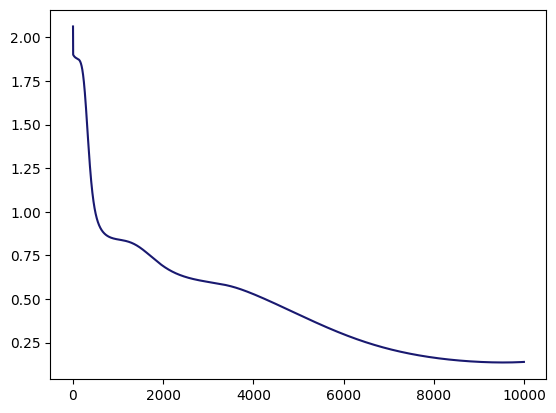

In [19]:
import matplotlib.pyplot as plt

e = range(1, len(SSR) + 1)
plt.plot(e, SSR, color='midnightblue')
plt.show()